# ITCS 3162 Data Mining Project 2:

# Stardew Valley Item Profitability 

### Shan Raheim 

## Problem Introduction

If you’ve ever played the game Stardew Valley, you’ve probably found yourself wondering which items are the most profitable to sell. Stardew Valley is, at its core, a farming simulator. On the surface, it seems like a simple game where you start a farm and grow crops—and if you think this, you're not wrong. But there's so much more to do in the game. Players can set up a farm to their liking, producing a variety of products that can be crafted. You can raise animals and explore different types of crops, items, and craftable goods. The main goal is to enjoy life on the farm, make money, and grow the farm you inherited from your grandfather. While it seems simple at first, the game can quickly become addictive.

You get to know the town of Stardew Valley by meeting its villagers and exploring different areas of the game. You can build relationships with each villager and participate in various activities throughout the year. You can also start a family and manage your property in many ways. Beyond farming, players can fish, mine, and find other methods to generate profit, though some of these activities can be quite tedious and test your patience. This is where my project addresses the core issue of this topic.

As a fellow player and community member, I quickly became addicted to the game, along with one of my friends. Initially, I didn’t think I would enjoy Stardew Valley, but I was completely wrong. After playing for a while and developing several long-standing farms, I frequently found myself wondering: What items are the most profitable? What should I focus my time and effort on? Throughout the game, I often looked up item values to determine what I should produce more of. Over time, I noticed patterns in what I chose to focus on, but I wasn’t the only one asking these questions. New players who were still figuring things out were in the same position. This realization inspired me to design this project around solving this issue.

## Data Introduction and Pre-processing 

By using the *Stardew Valley* wiki and my own game knowledge I put together my own spreadsheet/CSV of the data used in this project.  The columns included are item_name, quality, selling_price, and category.  The columns are self explanatory relating to an item and an example will be provided below.  The quality column was created since certain items have different tier qualities which are: Normal, Silver, Gold, and Iridium.  In the respective order mentioned beforehand an item's selling price increases with its quality. Quality and category columns can also be used to filter based on certain restrictions from those categories. 

The list is only composed of crops, animal products, and artisan goods since these are the main sources/categories of items the player can gain profit from at any point of the game from their farm.  The items included are **before the 1.6 update** since not all platforms have received the update which added new items.  The prices are based on the base prices of the items without the effect of special occupation perk bonuses like Tiller, Rancher, etc which increase certain item selling prices. 

To clarify before looking into any items, here are how some are made in-game:

    - Cheese if made from milk, goat cheese from goat milk and so on
    - Mayonnaise is made from eggs, void mayonnaise from void eggs and so on 
    - Fish roe are fish eggs and Sturgeon roe makes caviar (Sturgeon is the only fish where the roe when aged turns into caviar)
    - Wine and jelly are made from mostly all fruits in the game
    - Juice and pickles are made from mostly all vegetables in the game


Foragable items are not included in this list since they cannot be “grown” and they must be found in the wild in the respective seasons. Cooking items are not included in this list as well since they have to be made from the items harvested. 

In game there is a category of rare fish called legendary fish like the Crimsonfish, Angler, Legend, Glacierfish, and Mutant Carp can only be caught once in a game lifetime by the player.  BEFORE the 1.6 update these fish cannot produce respective roe. This also includes the extra legendary fish added to the world after obtaining the *Qi’s Extended Family Quest* that once obtained adds another set of legendary fish to the game that can only be caught once by the player.  Clams, squid, and midnight squid are the only "fish" that do not produce roe until after the 1.6 update.  


Item Profitability within the data is categorized like this:

Item Selling Price <= 200 = Low Profitability

Item Selling Price > 200 and <= 450 = Medium Profitability 

Item Selling Price > 450 = High Profitability

Due to the classification above the column "profitability" was made to be used as the target and an item's profitability will be filled here. 

In [2]:
import pandas as pd 
import seaborn as sb  
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
data_path = "../ITSC3162/stardew_item_info.csv" 
data = pd.read_csv(data_path)
df = pd.DataFrame(data)

### Data Example

In [69]:
print(df.shape)
df.head(15)

(602, 5)


,item_name,quality,selling_price,category,profitability
0,Parsnip,Normal,35,Crop,NaN
1,Parsnip,Silver,43,Crop,NaN
2,Parsnip,Gold,52,Crop,NaN
3,Parsnip,Iridium,70,Crop,NaN
4,Cauliflower,Normal,175,Crop,NaN
5,Cauliflower,Silver,218,Crop,NaN
6,Cauliflower,Gold,262,Crop,NaN
7,Cauliflower,Iridium,350,Crop,NaN
8,Potato,Normal,80,Crop,NaN
9,Potato,Silver,100,Crop,NaN


### Python Function to Determine Profitability 

In [5]:
def profitability_calc(selling_price):
    if (selling_price) <= 200:
        return "Low"
    elif (selling_price > 200) and (selling_price <= 450):
        return "Medium"
    else:
        return "High"

### Calculate Profitability to Each Item and Update the Profitability Column

In [35]:
df['profitability'] = df['selling_price'].apply(profitability_calc)

In [37]:
df.head(15)

,item_name,quality,selling_price,category,profitability
0,Parsnip,Normal,35,Crop,Low
1,Parsnip,Silver,43,Crop,Low
2,Parsnip,Gold,52,Crop,Low
3,Parsnip,Iridium,70,Crop,Low
4,Cauliflower,Normal,175,Crop,Low
5,Cauliflower,Silver,218,Crop,Medium
6,Cauliflower,Gold,262,Crop,Medium
7,Cauliflower,Iridium,350,Crop,Medium
8,Potato,Normal,80,Crop,Low
9,Potato,Silver,100,Crop,Low


### Data Visualization to Aid in Naive Bayes Model Toward the Bottom 

Below is a scatterplot that works well with Naive Bayes models since in Naive Bayes models each item is considered independent of each other which works well with the CSV I created.  Each item in respect to one another is their own item with their own attributes that distinguish themselves from each other.  I also used a scatterplot to help visualize the data. When each item is classified a person can observe the visual clusters where certain items are grouped together.    


<Axes: xlabel='category', ylabel='selling_price'>

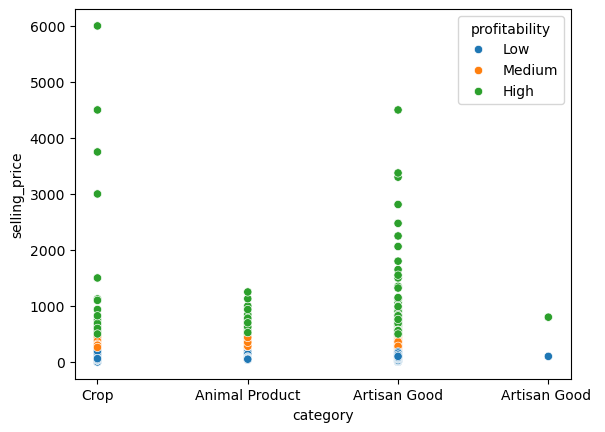

In [171]:
plt.figure()
sb.scatterplot(x = df['category'], y = df['selling_price'], hue = df['profitability'])

### Modeling and Storytelling

For my classification algorithm/model I chose Naive Bayes since it made the most sense for my data.  Due to my target being the selling_price column and each item's respective profitability is based off of it this is how the classification element is represented in my project.  Since each item has their own selling prices and categories they can all be considered independent of each other.  Also due to the simplicity of my CSV/data Naive Bayes matches well since both are simple and efficient.  Along with profitability classifications the respective item categories works well with a Naive Bayes model since it can also be used for classification within this project.  With Naive Bayes there are different types that can be used but for this project Gaussian Naive Bayes was used since others were more specialized for text classification, multidimensional aspects of Naive Bayes, imbalanced data, and larger data sets. 





In [55]:
X = df.iloc[:, 2].values.reshape(-1, 1)
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9668874172185431


As indicated above the model performs well that 1.0 translates to 100% accuracy.  It seems skeptical at first but it makes sense since the dataset used did not have a high enough complexity.  Since this is a Naive Bayes model when each item is classified the overall accuracy has been obtained by combining the probabilities of each item getting classified.  

The impact of my project in relation to the game's community and people interested in the game can be that if a player interested in this game can look at this project and analyze what items are the most profitable.  They can invest more time into items that will make the most type of profit and which ones to move away from since time and effort can be saved.  To support the information the model with the accuracy calculated can be used to back up the item profitability used.  A negative impact/con of this project that I notice is that due to the data's simplicity and complexity the accuracy can be easily guessed and explained after the first test.  A higher complexity could be better for this project to help explain which item can be most profitable and how the tests will support these cases but since Naive Bayes was used it is relatively easy to conduct this process.  Due to the simplicity it can cause skepticism to arise causing doubts with the tests and model.  





### Sources 

https://stardewvalleywiki.com/Stardew_Valley_Wiki 
https://docs.google.com/spreadsheets/d/19Xl9uWHdYL4ilcqrWV4mUPCXl91mfHNzjogzOIX8OEw/edit?gid=0#gid=0

*Stardew Valley.* 2016. Nintendo Switch, Android, macOS, PlayStation 4, iOS. ConcernedApe 